         Date     Price      Open      High       Low     Vol. Change %
0  24/02/2025  94,597.5  96,261.0  96,497.9  94,209.4   60.93K   -1.73%
1  23/02/2025  96,258.8  96,556.2  96,655.2  95,259.5   38.82K   -0.31%
2  22/02/2025  96,556.1  96,158.3  96,930.8  95,801.1   45.62K    0.42%
3  21/02/2025  96,155.6  98,310.3  99,473.4  94,903.6  104.28K   -2.19%
4  20/02/2025  98,310.3  96,645.2  98,721.6  96,441.9   61.84K    1.72%
              Price     Open     High      Low      Vol.  Change %
Date                                                              
2021-01-24  32241.3  32088.5  33034.8  30982.9   88210.0      0.47
2021-01-25  32252.3  32244.3  34854.3  31967.4  142430.0      0.03
2021-01-26  32502.1  32244.1  32917.7  30850.0  139840.0      0.77
2021-01-27  30404.0  32499.6  32545.4  29290.4  194350.0     -6.46
2021-01-28  33374.8  30408.9  33790.8  29911.9  167390.0      9.77


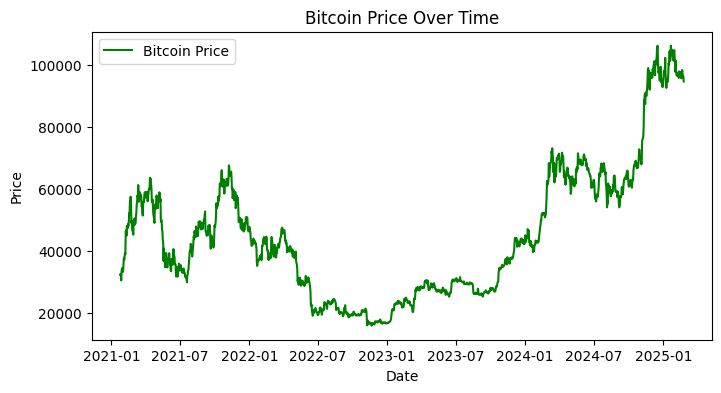

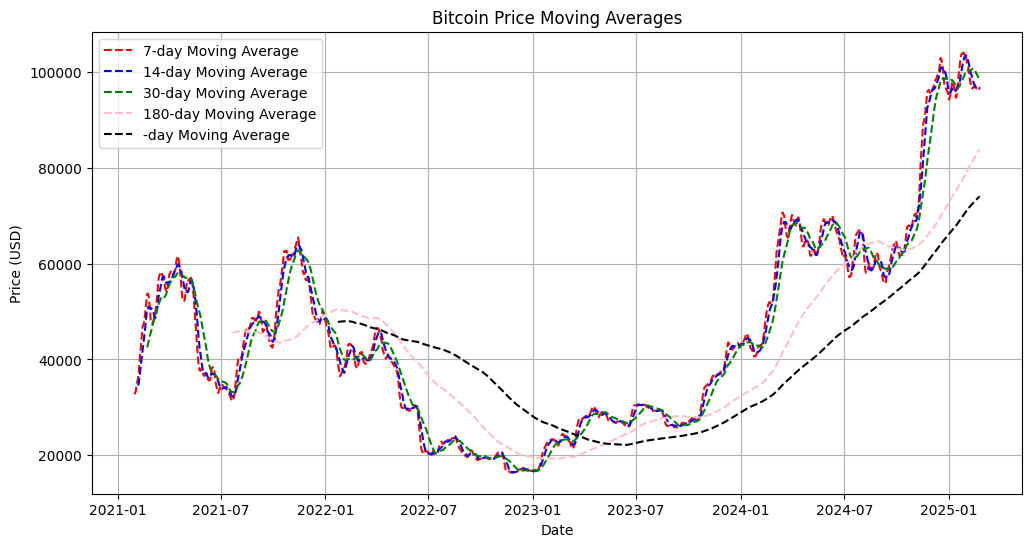

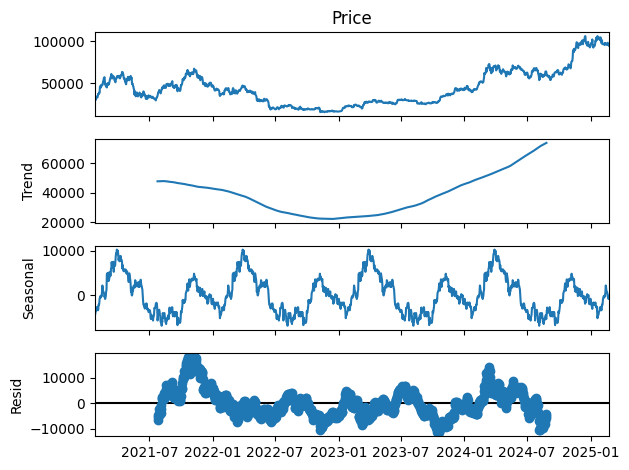

ADF Test Statistic: -0.4103986049516749
p-value: 0.9083480516724882
Data is NOT Stationary. Differencing needed
ADF Test Statistic: -10.119400516397421
p-value: 9.532953122310643e-18
Data is stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                 1493
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13005.963
Date:                Tue, 25 Feb 2025   AIC                          26017.926
Time:                        21:47:11   BIC                          26033.849
Sample:                    01-24-2021   HQIC                         26023.859
                         - 02-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0512      0.020     -2.507      0.012      -0.091      -0.011
ma.L1         -1.0000      0.141     -7.090      0.000      -1.276      -0.724
sigma2      2.172e+06   3.04e+05      7.147      0.0

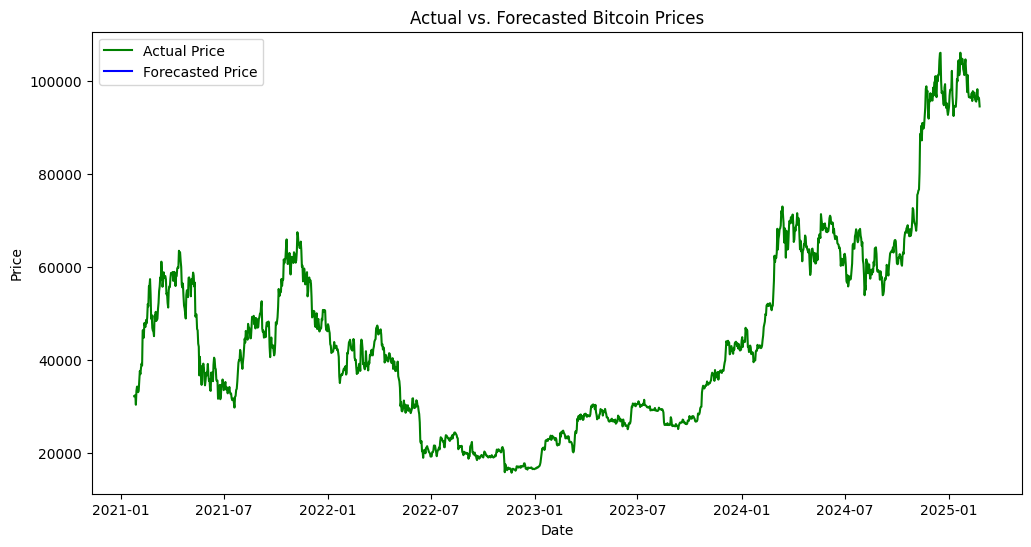

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1493
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13002.519
Date:                Tue, 25 Feb 2025   AIC                          26011.038
Time:                        21:47:14   BIC                          26026.962
Sample:                    01-24-2021   HQIC                         26016.972
                         - 02-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5302      0.290     -1.828      0.068      -1.099       0.038
ma.L1          0.4879      0.299      1.629      0.103      -0.099       1.075
sigma2      2.171e+06   4.64e+04     46.739      0.0

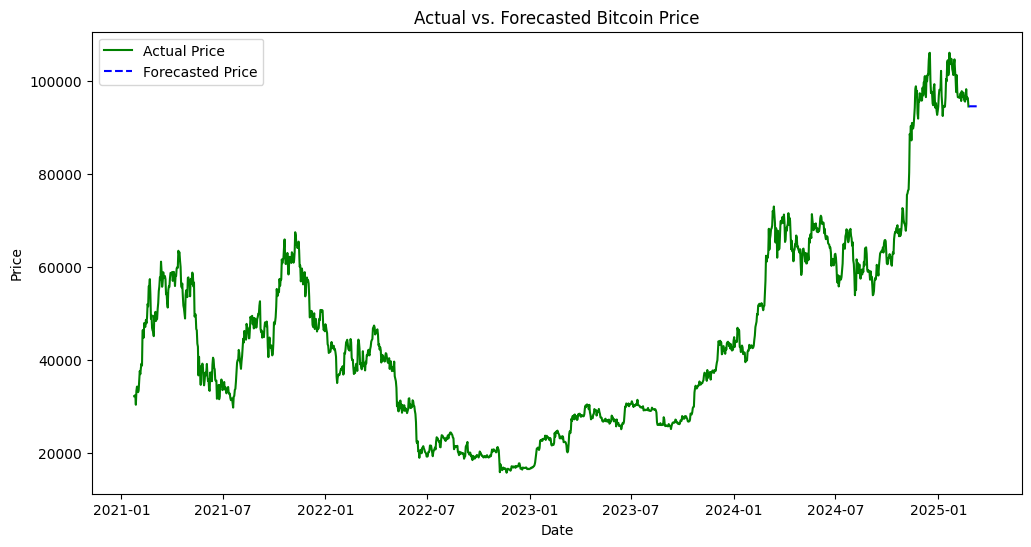

In [4]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#import the dataset
df = pd.read_csv(r'/content/Bitcoin Historical Results Price Data (1).csv')
print(df.head())

# cleaning comma's from other values
df['Price'] = df['Price'].replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
df['Open'] = df['Open'].replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
df['High'] = df['High'].replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
df['Low'] = df['Low'].replace(',', '', regex=True).astype(float)  # Remove commas and convert to float

#cleaning K, M, B values
df["Vol."] = df["Vol."].astype(str).replace(
    {"K": "*1e3", "M": "*1e6", "B": "*1e9"}, regex=True).map(pd.eval).astype(float)

#Removing Percentage symbol
df["Change %"] = df["Change %"].astype(str).str.replace("%", "").astype(float)

# Fix Data format and convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)
# Set 'Date' as index
df.set_index('Date', inplace=True)
# Sort DataFrame in ascending order (oldest date first)
df = df.sort_index(ascending=True)
print(df.head())  # Check the first few rows


#plotting bitcoin price to get a better look
plt.figure(figsize=(8, 4))
plt.plot(df.index, df["Price"], label="Bitcoin Price", color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()


#: #Plotting in 7, 14, 30, 180, 365 day moving averages
df["7-day MA"] = df["Price"].rolling(window=7).mean()
df["14-day MA"] = df["Price"].rolling(window=14).mean()
df["30-day MA"] = df["Price"].rolling(window=30).mean()
df["180-day MA"] = df["Price"].rolling(window=180).mean()
df["365-day MA"] = df["Price"].rolling(window=365).mean()
plt.figure(figsize=(12,6))
plt.plot(df["7-day MA"], label="7-day Moving Average", linestyle="dashed",color="red")
plt.plot(df["14-day MA"], label="14-day Moving Average", linestyle="dashed",color="blue")
plt.plot(df["30-day MA"], label="30-day Moving Average", linestyle="dashed",color="green")
plt.plot(df["180-day MA"], label="180-day Moving Average", linestyle="dashed",color="pink")
plt.plot(df["365-day MA"], label="-day Moving Average", linestyle="dashed", color="black")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Moving Averages")
plt.legend()
plt.grid()
plt.show()

#Doing Decomposition
df = df.sort_index(ascending=True)
decomposition = seasonal_decompose(df['Price'], model='additive', period=365) #Adjust period as needed, seasonal decomposition formula
decomposition.plot() #plotting out
plt.show()


#Finding out if it's stationary or non-stationary by using statsmodels.tsa, arima, ad fuller imports (top markdown)
stationary_rez = adfuller(df["Price"].dropna())
print("ADF Test Statistic:", stationary_rez[0])
print("p-value:", stationary_rez[1])
if stationary_rez[1] > 0.05:
    print("Data is NOT Stationary. Differencing needed")
else:
    print("Data is stationary")

df["Price_diff"] = df["Price"].diff().dropna()

# p-value to0 high, Adding a column of price difference and running again
df["Price_diff"] = df["Price"].diff().dropna()
result = adfuller(df["Price_diff"].dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("data is NOT Stationary. Differencing needed")
else:
    print("Data is stationary")

#Defining and fitting ARIMA model (p=1, d=1, q=1)
model= ARIMA(df["Price_diff"], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
#Forecasting the next 20 days
forecast_steps=20
forecast=model_fit.forecast(steps=forecast_steps)

#Plotting actual and forecast prices
forecast_df = pd.DataFrame({"Forecast": forecast}, index=forecast)
plt.figure(figsize=(12, 6))
# Plot actual prices
plt.plot(df.index, df["Price"], label="Actual Price", color="green")
# Plot forecasted prices
plt.plot(forecast_df.index, forecast_df["Forecast"], label="Forecasted Price",color="blue")
# Labels and Title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs. Forecasted Bitcoin Prices")
plt.legend()
plt.show()


# the current prediction, done in the class, ( and also the script provided in word doc) do not work, as the predicted values are not generated
# the reason why it does not work is because "forecast_df = pd.DataFrame({"Forecast": forecast}, index=forecast)" incorrectly sets the index.
# And also because we are using a differenced series (Price_diff) for the ARIMA model, we need to use the actual values
#here is the fixed code with chatgpt (OPENAI, 2025)


# Define and fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(df["Price"], order=(1, 1, 1))  # Use actual price (not differenced)
model_fit = model.fit()
print(model_fit.summary())

# Forecasting next 20 days
forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates for forecast
last_date = df.index[-1]  # Get the last available date
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq="D")[1:]  # Skip first (it’s the last known date)

# Create forecast DataFrame with proper index
forecast_df = pd.DataFrame({"Forecast": forecast.values}, index=forecast_dates)

# Plot actual vs. forecasted prices
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(df.index, df["Price"], label="Actual Price", color="green")

# Plot forecasted prices
plt.plot(forecast_df.index, forecast_df["Forecast"], label="Forecasted Price", color="blue", linestyle="dashed")

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs. Forecasted Bitcoin Price")
plt.legend()
plt.show()

# The parameter d=1 indicates that the data was not stationary and we first needed to subtract the previous value from the current value to remove trends
